# Week 04 Assignments

**Due date**: Tue, September 15 by 3:30pm (submit on Sakai)

## Data

The assignment uses the following files:

* [`saccharomyces_cerevisiae.gff`](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/data/saccharomyces_cerevisiae.gff)

# GFF formatted genomic feature files

Generic Feature Format (GFF) is a widely used format for presenting genomic features.  NCBI and most model organism genome databases provide GFF files.

At their heart GFF files are are tab-delimited tables with nine columns (fields) of information. A short summary of what these columns provide is provided below. For a full description of the GFF format see the [GFF3 Specification](https://github.com/The-Sequence-Ontology/Specifications/blob/master/gff3.md).  The textual description given below are minor modifications of those provided in the GFF3 spec.

1. "seqid" -- the ID of the landmark used to establish the coordinate system for the current feature. Often this refers to the chromosome on which the feature is found, e.g. "1" or "chrI", but sometimes it refers to something else like an accession number. 


2. "source" -- typically this is the name of a database (e.g. "Genbank", "SGD") or software tool that generated the feature information.

3. "type" - the type of the feature, such as "gene", "intron", "CDS" (coding sequence), etc.

4. "start" -- The start coordinates of the feature given in positive 1-based integer coordinates, relative to the landmark given in column one.

5. "end" -- The end coordinates of the feature given in positive 1-based integer coordinates, relative to the landmark given in column one. Note that start is always less than or equal to end. 

6. "score" - the score of the feature, a floating point number. The semantics of the score are ill-defined but are often used to indicate aspects of the quality or certainty of the feature prediction.

7. "strand" -- the strand of the feature. `+` for positive strand (relative to the landmark), `-` for minus strand, and `.` for features that are not stranded. In addition, `?` can be used for features whose strandedness is relevant, but unknown.  For examples, genes that are sense with respect to the DNA sequence of the landmark (seqid) given in column one will be `+`, while genes that are sense with respect to the complementary strand would be `-` for this oclumn.

8. "phase" -- for features of type "CDS", the phase indicates where the next codon begins relative to the 5' end (where the 5' end of the CDS is relative to the strand of the CDS feature) of the current CDS feature. 

9. "attributes" -- A list of feature attributes in the format tag=value. Multiple tag=value pairs are separated by semicolons. URL escaping rules are used for tabs (and often spaces) and the characters: ",=;". 



## Assignment 01

a) Since GFF file are simple tab delimited files, we can use Pandas functions like `read_csv` or `read_table` to create a DataFrame from a GFF file.  However, there are a few minor complications we need to deal with:

1. GFF files sometimes include lines with additional non-tabular information.  These lines begin with the `#` character.  When reading the file we need to tell the `read_csv` or `read_table` function to ignore such lines.

2. There is no "header" row in a GFF file, specifying what the names of the  columns are, so we need to specify the names when we call `read_csv` or `read_table`.

Dealing with both (1) and (2) above can be accomplished by specifying additional arguments that are passed to `read_csv`.

Using the [Pandas documentation on `read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv) as a guide, figure out how to read the `saccharomyces_cerevisiae.gff` file into a DataFrame.  The resulting DataFrame should have 9 columns with the names `["Seqid", "Source", "Type", "Start", "End", "Score", "Strand", "Phase", "Attributes"]` (4 pts). 

NOTE: If you are unable to successfully complete problem 1a I have provided a CSV file with the equivalent information at this link: [`scer_gff_as_csv.csv`](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/data/scer_gff_as_csv.csv) that will allow you to work on the other problems below.  However, you get credit for 1a if you need to use that file.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
headerList = ["Seqid", "Source", "Type", "Start", "End", "Score", "Strand", "Phase", "Attributes"]
df1 = pd.read_csv("/Users/cleve/OneDrive/Documents/Notes/Notebooks Linked Materials/Duke University/Bio 208 Computing on the Genome/saccharomyces_cerevisiae.gff", delimiter="\t", names=headerList, skiprows = 18)
df1

,Seqid,Source,Type,Start,End,Score,Strand,Phase,Attributes
0,chrI,SGD,chromosome,1,230218,.,.,.,ID=chrI;dbxref=NCBI:NC_001133;Name=chrI
1,chrI,SGD,telomere,1,801,.,-,.,ID=TEL01L;Name=TEL01L;Note=Telomeric%20region%...
2,chrI,SGD,X_element,337,801,.,-,.,ID=TEL01L_X_element;Name=TEL01L_X_element;dbxr...
3,chrI,SGD,X_element_combinatorial_repeat,63,336,.,-,.,ID=TEL01L_X_element_combinatorial_repeat;Name=...
4,chrI,SGD,telomeric_repeat,1,62,.,-,.,ID=TEL01L_telomeric_repeat;Name=TEL01L_telomer...
...,...,...,...,...,...,...,...,...,...
23053,chrmt,SGD,ncRNA_gene,85295,85777,.,+,.,ID=Q0285;Name=Q0285;gene=RPM1;Alias=RPM1;Ontol...
23054,chrmt,SGD,noncoding_exon,85295,85777,.,+,.,Parent=Q0285;Name=Q0285_noncoding_exon;dbxref=...
23055,chrmt,SGD,gene,85554,85709,.,+,.,ID=Q0297;Name=Q0297;Alias=ORF12;Ontology_term=...
23056,chrmt,SGD,CDS,85554,85709,.,+,0,Parent=Q0297_mRNA;Name=Q0297_CDS;orf_classific...


In [3]:
df1.columns

Index(['Seqid', 'Source', 'Type', 'Start', 'End', 'Score', 'Strand', 'Phase',
       'Attributes'],
      dtype='object')

In [4]:
df1.index

RangeIndex(start=0, stop=23058, step=1)

b) How many features are in the `saccharomyces_cerevisiae.gff` file? (1 pt)

In [5]:
len(df1)

23058

c) What features types are in the file? (1 pt)

In [6]:
df1.Type.unique()
# len(df1.Type.unique()) = 44

array(['chromosome', 'telomere', 'X_element',
       'X_element_combinatorial_repeat', 'telomeric_repeat', 'gene',
       'CDS', 'mRNA', 'ARS', 'long_terminal_repeat', 'region',
       'ARS_consensus_sequence', 'intron', 'ncRNA_gene', 'noncoding_exon',
       'tRNA_gene', 'snoRNA_gene', 'centromere',
       'centromere_DNA_Element_I', 'centromere_DNA_Element_II',
       'centromere_DNA_Element_III', 'LTR_retrotransposon',
       'transposable_element_gene', 'pseudogene', 'Y_prime_element',
       'plus_1_translational_frameshift', 'five_prime_UTR_intron',
       'telomerase_RNA_gene', 'matrix_attachment_site', 'snRNA_gene',
       'silent_mating_type_cassette_array', 'W_region', 'X_region',
       'Y_region', 'Z1_region', 'Z2_region', 'mating_type_region',
       'intein_encoding_region', 'blocked_reading_frame', 'rRNA_gene',
       'external_transcribed_spacer_region',
       'internal_transcribed_spacer_region', 'non_transcribed_region',
       'origin_of_replication'], dtype=object)

d) Create a new column in your dataframe, called `Length` by calculating the difference between the `End` and `Start` coordinates for each feature. (1 pt)

In [7]:
df1["Length"] = np.abs(df1.End - df1.Start)
df1

,Seqid,Source,Type,Start,End,Score,Strand,Phase,Attributes,Length
0,chrI,SGD,chromosome,1,230218,.,.,.,ID=chrI;dbxref=NCBI:NC_001133;Name=chrI,230217
1,chrI,SGD,telomere,1,801,.,-,.,ID=TEL01L;Name=TEL01L;Note=Telomeric%20region%...,800
2,chrI,SGD,X_element,337,801,.,-,.,ID=TEL01L_X_element;Name=TEL01L_X_element;dbxr...,464
3,chrI,SGD,X_element_combinatorial_repeat,63,336,.,-,.,ID=TEL01L_X_element_combinatorial_repeat;Name=...,273
4,chrI,SGD,telomeric_repeat,1,62,.,-,.,ID=TEL01L_telomeric_repeat;Name=TEL01L_telomer...,61
...,...,...,...,...,...,...,...,...,...,...
23053,chrmt,SGD,ncRNA_gene,85295,85777,.,+,.,ID=Q0285;Name=Q0285;gene=RPM1;Alias=RPM1;Ontol...,482
23054,chrmt,SGD,noncoding_exon,85295,85777,.,+,.,Parent=Q0285;Name=Q0285_noncoding_exon;dbxref=...,482
23055,chrmt,SGD,gene,85554,85709,.,+,.,ID=Q0297;Name=Q0297;Alias=ORF12;Ontology_term=...,155
23056,chrmt,SGD,CDS,85554,85709,.,+,0,Parent=Q0297_mRNA;Name=Q0297_CDS;orf_classific...,155


e) The "Seqid" field gives the chromosome that each feature is found on.  The chromosome names in this file have a roman numeral format -- e.g. "chrI" = chromosome 01, "chrII" = chromosome 2, etc.  

Create a dictionary that maps each roman numeral name to a corresponding integer value (give the mitochondrial genome the value 17) 

and then use this dictionary with the Pandas `replace` method to replace all the corresponding values in the "Seqid" column. See the [`replace` docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) for details and examples.  (4 pts)

In [8]:
df1.Seqid.unique()

array(['chrI', 'chrII', 'chrIII', 'chrIV', 'chrV', 'chrVI', 'chrVII',
       'chrVIII', 'chrIX', 'chrX', 'chrXI', 'chrXII', 'chrXIII', 'chrXIV',
       'chrXV', 'chrXVI', 'chrmt'], dtype=object)

In [9]:
dict = {
    "chrI" : 1,
    "chrII" : 2,
    "chrIII" : 3,
    "chrIV" : 4,
    "chrV" : 5,
    "chrVI" : 6,
    "chrVII" : 7,
    "chrVIII" : 8,
    "chrIX" : 9,
    "chrX" : 10,
    "chrXI" : 11,
    "chrXII" : 12,
    "chrXIII" : 13,
    "chrXIV" : 14,
    "chrXV" : 15,
    "chrXVI" : 16,
    "chrmt" : 17,
}

In [10]:
df1copy = df1.replace(to_replace = dict, value = None)
df1copy

,Seqid,Source,Type,Start,End,Score,Strand,Phase,Attributes,Length
0,1,SGD,chromosome,1,230218,.,.,.,ID=chrI;dbxref=NCBI:NC_001133;Name=chrI,230217
1,1,SGD,telomere,1,801,.,-,.,ID=TEL01L;Name=TEL01L;Note=Telomeric%20region%...,800
2,1,SGD,X_element,337,801,.,-,.,ID=TEL01L_X_element;Name=TEL01L_X_element;dbxr...,464
3,1,SGD,X_element_combinatorial_repeat,63,336,.,-,.,ID=TEL01L_X_element_combinatorial_repeat;Name=...,273
4,1,SGD,telomeric_repeat,1,62,.,-,.,ID=TEL01L_telomeric_repeat;Name=TEL01L_telomer...,61
...,...,...,...,...,...,...,...,...,...,...
23053,17,SGD,ncRNA_gene,85295,85777,.,+,.,ID=Q0285;Name=Q0285;gene=RPM1;Alias=RPM1;Ontol...,482
23054,17,SGD,noncoding_exon,85295,85777,.,+,.,Parent=Q0285;Name=Q0285_noncoding_exon;dbxref=...,482
23055,17,SGD,gene,85554,85709,.,+,.,ID=Q0297;Name=Q0297;Alias=ORF12;Ontology_term=...,155
23056,17,SGD,CDS,85554,85709,.,+,0,Parent=Q0297_mRNA;Name=Q0297_CDS;orf_classific...,155


 f) Show how to create a DataFrame that only contains the nuclear chromosome features. How many  chromosomes are there? (2 pts)

In [11]:
## your code 
headerList = ["Seqid", "Source", "Type", "Start", "End", "Score", "Strand", "Phase", "Attributes"]
df2 = pd.read_csv("/Users/cleve/OneDrive/Documents/Notes/Notebooks Linked Materials/Duke University/Bio 208 Computing on the Genome/saccharomyces_cerevisiae.gff", delimiter="\t", names=headerList, skiprows = 18, skipfooter = 214)
len(df2.Seqid.unique())

<ipython-input-11-3ddc7986fa9b>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv("/Users/cleve/OneDrive/Documents/Notes/Notebooks Linked Materials/Duke University/Bio 208 Computing on the Genome/saccharomyces_cerevisiae.gff", delimiter="\t", names=headerList, skiprows = 18, skipfooter = 214)


16

In [12]:
df2["Length"] = np.abs(df2.End - df2.Start)
df2

,Seqid,Source,Type,Start,End,Score,Strand,Phase,Attributes,Length
0,chrI,SGD,chromosome,1,230218,.,.,.,ID=chrI;dbxref=NCBI:NC_001133;Name=chrI,230217
1,chrI,SGD,telomere,1,801,.,-,.,ID=TEL01L;Name=TEL01L;Note=Telomeric%20region%...,800
2,chrI,SGD,X_element,337,801,.,-,.,ID=TEL01L_X_element;Name=TEL01L_X_element;dbxr...,464
3,chrI,SGD,X_element_combinatorial_repeat,63,336,.,-,.,ID=TEL01L_X_element_combinatorial_repeat;Name=...,273
4,chrI,SGD,telomeric_repeat,1,62,.,-,.,ID=TEL01L_telomeric_repeat;Name=TEL01L_telomer...,61
...,...,...,...,...,...,...,...,...,...,...
22839,chrXVI,SGD,CDS,944603,947701,.,+,0,Parent=YPR204W_mRNA;Name=YPR204W_CDS;orf_class...,3098
22840,chrXVI,SGD,mRNA,944603,947701,.,+,.,ID=YPR204W_mRNA;Name=YPR204W_mRNA;Parent=YPR204W,3098
22841,chrXVI,SGD,gene,946856,947338,.,-,.,ID=YPR204C-A;Name=YPR204C-A;Ontology_term=GO:0...,482
22842,chrXVI,SGD,CDS,946856,947338,.,-,0,Parent=YPR204C-A_mRNA;Name=YPR204C-A_CDS;orf_c...,482


g) What is the total genome size, excluding the mitochondrial genome? (1 pt)

In [13]:
genomeSize = df2[df2["Type"] == "chromosome"]
genomeSize["Length"].sum()

12071310

h) Which is the longest nuclear chromosome? Which is the shortest nuclear chromosome? (1 pt)

In [14]:
df2.Seqid.unique()

array(['chrI', 'chrII', 'chrIII', 'chrIV', 'chrV', 'chrVI', 'chrVII',
       'chrVIII', 'chrIX', 'chrX', 'chrXI', 'chrXII', 'chrXIII', 'chrXIV',
       'chrXV', 'chrXVI'], dtype=object)

In [15]:
array1 = genomeSize[["Seqid", "Length"]]
print(array1.sort_values(by = "Length").iloc[-1])

Seqid       chrIV
Length    1531932
Name: 2680, dtype: object


In [16]:
print(array1.sort_values(by = "Length").iloc[0])

Seqid       chrI
Length    230217
Name: 0, dtype: object


i) In yeast, genomic features called "Autonomously Replicating Sequences" (ARS) serve as origins of replication (i.e. the sites where DNA replication begins).  How many ARS elements in total are there in the yeast reference genome? (1 pt)

In [17]:
dfARS = df2[df2['Type'] == "ARS"]
len(dfARS)

352

j) How many ARS features are there on each chromosome? (1 pt)

In [42]:
chrm = df1copy[df1copy["Type"] == "ARS"]
chrm = chrm["Seqid"].value_counts()
chrm = pd.DataFrame(chrm)
chrm.columns = ["Count"]
chrm["Seqid"] = chrm.index
chrm.reset_index(drop=True, inplace=True)
chrm

,Count,Seqid
0,41,4
1,29,12
2,28,7
3,27,16
4,26,13
5,25,10
6,23,2
7,21,14
8,21,5
9,19,15


In [43]:
 dfARS.groupby("Seqid").Type.count()

Seqid
chrI       11
chrII      23
chrIII     19
chrIV      41
chrIX      16
chrV       21
chrVI      14
chrVII     28
chrVIII    16
chrX       25
chrXI      16
chrXII     29
chrXIII    26
chrXIV     21
chrXV      19
chrXVI     27
Name: Type, dtype: int64

k) Create a DataFrame that only contains ARS features. (1 pt)

In [44]:
dfARS["Length"] = np.abs(dfARS.End - dfARS.Start)
dfARS

<ipython-input-44-fde83c42eb3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfARS["Length"] = np.abs(dfARS.End - dfARS.Start)


,Seqid,Source,Type,Start,End,Score,Strand,Phase,Attributes,Length
11,chrI,SGD,ARS,707,776,.,.,.,ID=ARS102;Name=ARS102;Alias=ARSI-1;Note=Autono...,69
21,chrI,SGD,ARS,7997,8547,.,.,.,ID=ARS103;Name=ARS103;Alias=ARSI-8;Note=Autono...,550
45,chrI,SGD,ARS,30946,31183,.,.,.,ID=ARS104;Name=ARS104;Alias=ARSI-31;Note=Auton...,237
71,chrI,SGD,ARS,41992,42151,.,.,.,ID=ARS105;Name=ARS105;Alias=ARSI-42;Note=Auton...,159
127,chrI,SGD,ARS,70300,70469,.,.,.,ID=ARS106;Name=ARS106;Alias=ARSI-70;Note=Auton...,169
...,...,...,...,...,...,...,...,...,...,...
22636,chrXVI,SGD,ARS,842653,842900,.,.,.,ID=ARS1628;Name=ARS1628;Alias=ARSXVI-843;Note=...,247
22651,chrXVI,SGD,ARS,850512,850629,.,.,.,ID=ARS1629;Name=ARS1629;Note=Putative%20replic...,117
22711,chrXVI,SGD,ARS,880861,881108,.,.,.,ID=ARS1630;Name=ARS1630;Alias=ARSXVI-881;Note=...,247
22808,chrXVI,SGD,ARS,932983,933229,.,.,.,ID=ARS1631;Name=ARS1631;Alias=ARSXVI-933;Note=...,246


l) Draw a scatter plot with chromosome length on the x-axis and the number of ARS feature per chromosome on the y-axis. Make sure to give your figure appropriate axis labels (3 pts)

In [45]:
#plt.scatter(dfARS.groupby("Seqid").Length.count(), dfARS.groupby("Seqid").Type.count())
tableprep = df1copy[df1copy["Type"] == "chromosome"]
tableprep = tableprep[["Seqid", "Length"]]
tableprep

,Seqid,Length
0,1,230217
424,2,813183
1980,3,316619
2680,4,1531932
5519,5,576873
6675,6,270160
7207,7,1090939
9260,8,562642
10378,9,439887
11216,10,745750


KeyError: 'Chromosome Length'

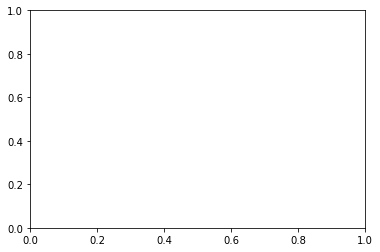

In [57]:
table = chrm.merge(tableprep, on="Seqid")
table.plot.scatter(x = "Chromosome Length", y = "ARS Features per Chromosome")

m) Using matplotlib, create a figure that shows each of the yeast nuclear chromosomes as bars, with the start location of each ARS feature on each chromosom indicated with a triangular marker. Your figure should like similar to the image shown [at this link](https://github.com/bio208fs-class/bio208fs-lecture/blob/master/images/ARS-example-figure.png). (5 pts)

In [58]:
dfARScopy = dfARS[["Seqid", "Start"]]
dfARScopy = dfARScopy.replace(to_replace=dict)
dfARScopy

,Seqid,Start
11,1,707
21,1,7997
45,1,30946
71,1,41992
127,1,70300
...,...,...
22636,16,842653
22651,16,850512
22711,16,880861
22808,16,932983


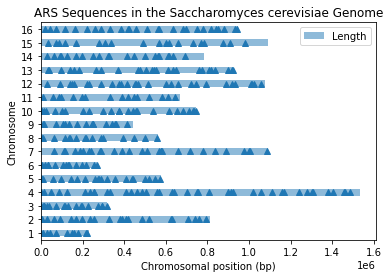

In [59]:
nuc_chromlens = tableprep[tableprep["Seqid"]<17]
nuc_chromlens.plot.barh(x = "Seqid", y = "Length", alpha = 0.5)
y = dfARScopy[["Seqid"]]-1
x = dfARScopy[["Start"]]
plt.plot(x,y,marker = "^",linestyle='')
plt.xlabel("Chromosomal position (bp)")
plt.ylabel("Chromosome")
plt.title("ARS Sequences in the Saccharomyces cerevisiae Genome")
plt.show()